In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [8]:
# Let's get the lables from a txt file
y_labels = []
with open('Chant data label.txt', encoding="utf-8") as f:
    for line in f:
        y_labels.append(int(line))

In [9]:
# Turn into a numpy array
y_labels = np.array(y_labels)

In [11]:
y_labels

array([17, 15,  9,  7,  9,  9,  9, 14, 15, 19, 21, 20, 14, 15, 15, 10, 16,
       14, 16, 11, 18, 20, 18, 20, 21, 21, 20, 20, 20, 12])

In [13]:
num_classes = len(np.unique(y_labels))
print(f'Number of unique counts: {num_classes}')

Number of unique counts: 13


In [14]:
# Current datatype
y_labels.dtype

dtype('int64')

In [15]:
# One-hot encode the labels
y = keras.utils.to_categorical(y_labels, dtype='int64')

In [66]:
# Let's see what all the different image sizes are
directory = 'Chant_Data'

for i in range(1, 31):
    if i < 10:
        im_name = os.path.join(directory, f'{i:02}.png')
    else:
        im_name = os.path.join(directory, f'{i}.png')
    im_test = keras.utils.load_img(
        im_name,
        color_mode="grayscale",
        target_size=None,
        interpolation="bilinear",
        keep_aspect_ratio=False,
    )
    img = np.array(im_test)
    print(img.shape)

(106, 744)
(100, 806)
(100, 806)
(100, 806)
(100, 806)
(100, 806)
(100, 806)
(100, 806)
(100, 796)
(160, 1550)
(184, 1626)
(196, 1654)
(84, 642)
(84, 694)
(84, 694)
(84, 694)
(116, 710)
(116, 764)
(116, 764)
(116, 764)
(116, 700)
(100, 770)
(100, 770)
(100, 770)
(100, 770)
(100, 770)
(100, 770)
(100, 770)
(100, 770)
(100, 770)


In [124]:
# Let's loads the dataset

size = (80, 160, 1)
directory = 'Chant_Data'
imgs = []

for i in range(1, 31):
    if i < 10:
        im_name = os.path.join(directory, f'{i:02}.png')
    else:
        im_name = os.path.join(directory, f'{i}.png')
    im_test = keras.utils.load_img(
        im_name,
        color_mode="grayscale",
        target_size=size,
        interpolation="bilinear",
        keep_aspect_ratio=False,
    )
    img = np.array(im_test)
    height, width = img.shape
    imgs.append(img.reshape(height, width, 1))

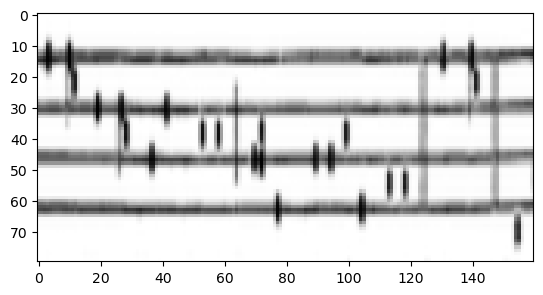

In [125]:
# Example image
plt.imshow(np.array(imgs[9]), cmap='gray')

In [126]:
X = np.array(imgs)
X.shape

(30, 80, 160, 1)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [129]:
len(X_train), len(X_test), len(y_train), len(y_test)

(27, 3, 27, 3)

In [130]:
X_train.shape, X_test.shape

((27, 80, 160, 1), (3, 80, 160, 1))

In [131]:
y_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [132]:
X_train.shape[1:]

(80, 160, 1)

In [133]:
model = keras.models.Sequential()
model.add(keras.layers.Rescaling(1./255))
model.add(keras.layers.RandomFlip('vertical'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=size))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(22))

In [134]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(np.array(X_train), np.array(y_train), batch_size=20, epochs=100, 
                    validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/100
2/2 [==============================] - 1s 181ms/step - loss: 8.8159 - accuracy: 0.1111 - val_loss: 16.1181 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 112ms/step - loss: 7.1883 - accuracy: 0.0370 - val_loss: 0.1657 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 113ms/step - loss: 9.0086 - accuracy: 0.0741 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 111ms/step - loss: 7.7880 - accuracy: 0.1481 - val_loss: 1.0130 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 114ms/step - loss: 9.1353 - accuracy: 0.1111 - val_loss: 0.6513 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 112ms/step - loss: 8.9593 - accuracy: 0.1481 - val_loss: 0.4119 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 119ms/step - loss: 8.9545 - accuracy: 0.1481 - val_loss: 1.1921e-07 - val_accuracy

2/2 [==============================] - 0s 125ms/step - loss: 8.9545 - accuracy: 0.1111 - val_loss: 0.1347 - val_accuracy: 0.3333
Epoch 59/100
2/2 [==============================] - 0s 121ms/step - loss: 8.9545 - accuracy: 0.1111 - val_loss: 0.1347 - val_accuracy: 0.3333
Epoch 60/100
2/2 [==============================] - 0s 121ms/step - loss: 8.9545 - accuracy: 0.1111 - val_loss: 0.1346 - val_accuracy: 0.3333
Epoch 61/100
2/2 [==============================] - 0s 120ms/step - loss: 8.9545 - accuracy: 0.1111 - val_loss: 0.1346 - val_accuracy: 0.3333
Epoch 62/100
2/2 [==============================] - 0s 120ms/step - loss: 8.9545 - accuracy: 0.1111 - val_loss: 0.1345 - val_accuracy: 0.3333
Epoch 63/100
2/2 [==============================] - 0s 123ms/step - loss: 8.9545 - accuracy: 0.1111 - val_loss: 0.1345 - val_accuracy: 0.3333
Epoch 64/100
2/2 [==============================] - 0s 123ms/step - loss: 8.9545 - accuracy: 0.1111 - val_loss: 0.1345 - val_accuracy: 0.3333
Epoch 65/100
2/2 [=

# Results

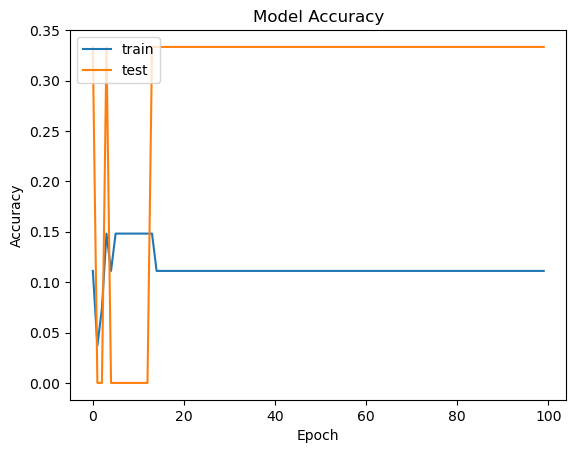

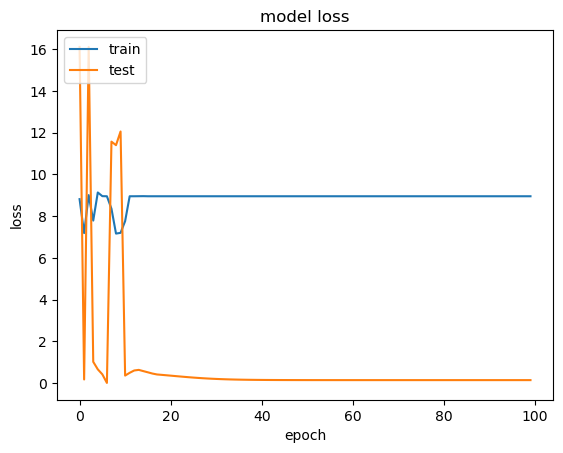

<Figure size 640x480 with 0 Axes>

In [136]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('Model_results')